In [9]:
import scipy.io
import numpy as np
import matplotlib.pyplot as pyplot
from PIL import Image
import matplotlib.cm as cm
from pprint import pprint
import scipy.misc
import PIL

In [10]:
def is_background(colno):
    row,col=mat.shape
    for i in range(0,row):
        if mat[i][colno]<0.9:
            return False
    return True

In [11]:
def get_matrix(col_no):
    matrix=[]
    row,col=mat.shape
    for i in range(col_no,col):
        if is_background(i)==False:
            z=mat[:,i]
            matrix.append(z)
        else:
            break
    matrix=np.matrix(matrix)
    matrix=np.transpose(matrix)
    pyplot.imshow(matrix,cmap=cm.gray)
    pyplot.show()
    image_arr.append(matrix.tolist())
    return i

In [12]:
def get_char_img():
    row,col=mat.shape
    col_no=0
    curr_col=0
    while True:
        for i in range(curr_col,col):
            found=is_background(i)
            if found==False:
                col_no=i
                break
        if i==col-1:
            break
        else:
            curr_col=get_matrix(col_no)
        

In [33]:
def process_image():
    img=scipy.misc.imread('conv.png')
    img=img[:,:,0]
    img=img/255.0
    pyplot.imshow(img,cmap=cm.gray)
    pyplot.show()
    return img

In [34]:
def get_cropped_image(image):
    new_img=[]
    for i in image:
        x=True
        for j in i:
            if j<0.5:
                x=False
                break
        if x==False:
            new_img.append(i)
    image=np.matrix(new_img)
    
    row,col=image.shape
    image=image.tolist()
    for i in range(row):
        for j in range(10):
            image[i].insert(0,1)
        for j in range(10):
            image[i].append(1)
    row=len(image)
    col=len(image[0])
    
    for j in range(10):
        image.append([1.0 for i in range(col)])
    for j in range(10):
        image.insert(0,[1.0 for i in range(col)])
    row=len(image)
    col=len(image[0])
    if row>col:
        diff=row-col
        front=int(diff/2)
        back=diff-front
        for i in range(row):
            for j in range(back):
                image[i].append(1)
            for j in range(front):
                image[i].insert(0,1)
            
    return image
    

# SEGMENTED IMAGE PADDING FUNCTION

In [35]:
def pad_image_and_resize(image):
    image_crop=get_cropped_image(image)
    baseheight = 20
    scipy.misc.imsave('temp.jpg', np.matrix(image_crop))
    img=Image.open('temp.jpg')
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((wsize, baseheight), PIL.Image.ANTIALIAS)
    
    #pyplot.imshow(np.matrix(img),cmap=cm.gray)
    #pyplot.show()
    return img
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


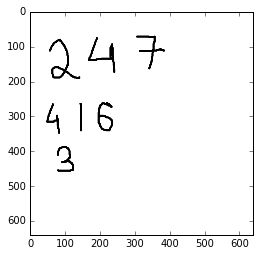

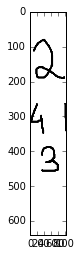

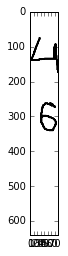

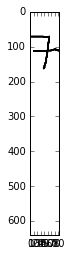

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


In [36]:
img=process_image()
image_arr=[]
mat=img
get_char_img()
arr=[]
for i in range(len(image_arr)):
    arr.append(pad_image_and_resize(image_arr[i]))